# Explore here

In [120]:
# Your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.feature_selection import chi2, SelectKBest
import numpy as np

dataframe = pd.read_csv("../data/raw/bank-marketing-campaign-data.csv", delimiter=";")

dataframe.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [121]:
dataframe["job_n"] = pd.factorize(dataframe["job"])[0]
dataframe["marital_n"] = pd.factorize(dataframe["marital"])[0]
dataframe["education_n"] = pd.factorize(dataframe["education"])[0]
dataframe["default_n"] = pd.factorize(dataframe["default"])[0]
dataframe["housing_n"] = pd.factorize(dataframe["housing"])[0]
dataframe["loan_n"] = pd.factorize(dataframe["loan"])[0]
dataframe["contact_n"] = pd.factorize(dataframe["contact"])[0]
dataframe["month_n"] = pd.factorize(dataframe["month"])[0]
dataframe["day_of_week_n"] = pd.factorize(dataframe["day_of_week"])[0]
dataframe["poutcome_n"] = pd.factorize(dataframe["poutcome"])[0]
dataframe["y_n"] = dataframe["y"].map({"yes": 1, "no": 0})

if dataframe.isnull().sum().sum() > 0 or dataframe.isna().sum().sum() > 0:
    print("Missing values found")
    dataframe = dataframe.dropna(axis=1)
else:
    print("No missing values")

if dataframe.duplicated().sum() > 0:
    print("Duplicates found")
    dataframe.drop_duplicates(inplace=True)
    dataframe.reset_index(drop=True, inplace=True)
else:
   print("No duplicates")

dataframe = dataframe.select_dtypes('number')

dataframe.describe()

No missing values
Duplicates found


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital_n,education_n,default_n,housing_n,loan_n,contact_n,month_n,day_of_week_n,poutcome_n,y_n
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,...,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870,...,0.510637,3.277370,0.208908,0.571959,0.199825,0.634714,2.249951,1.979600,0.169953,0.112663
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364,...,0.696794,2.185558,0.406713,0.541216,0.456055,0.481516,2.429157,1.411539,0.455811,0.316184
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,...,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,...,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,3.000000,3.000000,0.000000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,...,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,2.000000,1.000000


In [122]:
X = dataframe.drop("y_n", axis=1)
y = dataframe["y_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

k_best = min(5, X_train.shape[1])
select_k_best = SelectKBest(chi2, k=k_best)
select_k_best.fit(X_train, y_train)

selected_columns = select_k_best.get_support()
X_train_selected = pd.DataFrame(select_k_best.transform(X_train), columns=X_train.columns.values[selected_columns])
X_test_selected = pd.DataFrame(select_k_best.transform(X_test), columns=X_test.columns.values[selected_columns])

X_train_selected.head()

,previous,emp.var.rate,euribor3m,nr.employed,poutcome_n
0,0.0,1.000000,0.980730,1.000000,0.0
1,0.0,0.333333,0.138291,0.512287,0.0
2,0.0,0.937500,0.956926,0.859735,0.0
3,0.0,0.937500,0.957379,0.859735,0.0
4,0.0,0.333333,0.175924,0.512287,0.0


In [123]:
X_test_selected.head()

,previous,emp.var.rate,euribor3m,nr.employed,poutcome_n
0,0.000000,0.104167,0.143278,0.425709,0.0
1,0.142857,0.333333,0.150759,0.512287,0.5
2,0.000000,0.479167,0.073679,0.000000,0.0
3,0.142857,0.333333,0.150759,0.512287,0.5
4,0.000000,1.000000,0.981410,1.000000,0.0


In [124]:
model = LogisticRegression()
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
print(classification_report(y_test, y_pred))
print(f"ROC-AUC score: {roc_auc_score(y_test, model.predict_proba(X_test_selected)[:, 1])}")
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      3645
           1       0.66      0.12      0.21       473

    accuracy                           0.89      4118
   macro avg       0.78      0.56      0.57      4118
weighted avg       0.87      0.89      0.86      4118

ROC-AUC score: 0.7343260338092379
Accuracy score: 0.8919378338999514


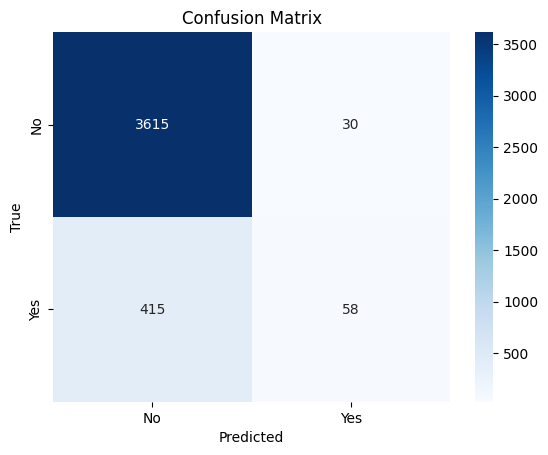

In [125]:
""" display as plot confusion matrix """
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [126]:
hyperparams = {
	"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
	"penalty": ["l1", "l2", "elasticnet", "none"],
	"solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "max_iter": [200, 250, 300, 500]
}

grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 10)
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 10, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga'}


In [129]:
model = LogisticRegression(**grid.best_params_)
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)
print(classification_report(y_test, y_pred))
print(f"ROC-AUC score: {roc_auc_score(y_test, model.predict_proba(X_test_selected)[:, 1])}")
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      3645
           1       0.67      0.12      0.20       473

    accuracy                           0.89      4118
   macro avg       0.78      0.56      0.57      4118
weighted avg       0.87      0.89      0.86      4118

ROC-AUC score: 0.7341006968913946
Accuracy score: 0.8919378338999514


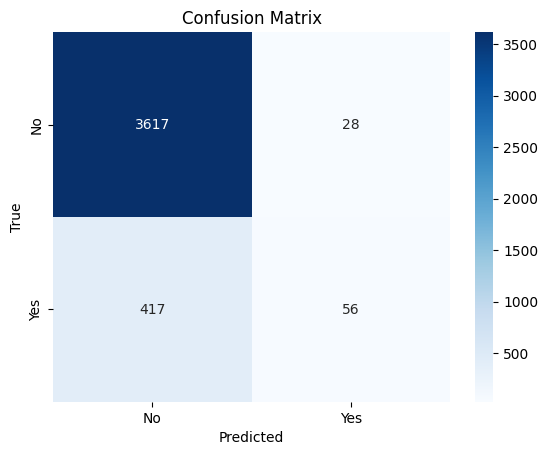

In [130]:
""" display as plot confusion matrix """
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()